In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/telecommunications_churn.csv")

In [3]:
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [4]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [5]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

Duplicates

In [6]:
len(df[df.duplicated()])

0

In [7]:
df[df.duplicated()].shape

(0, 19)

Outlier Detection

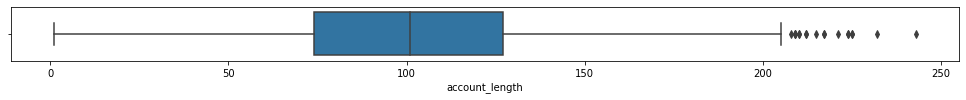

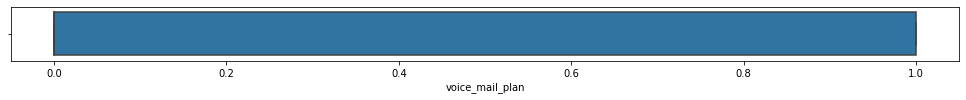

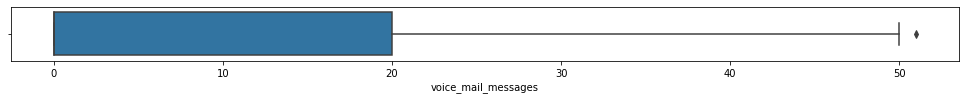

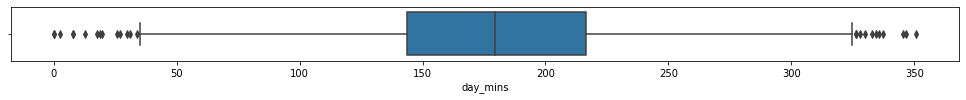

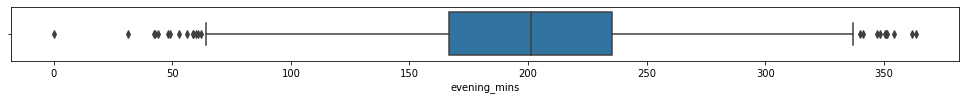

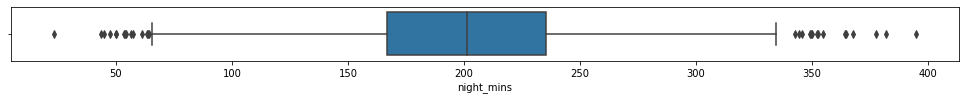

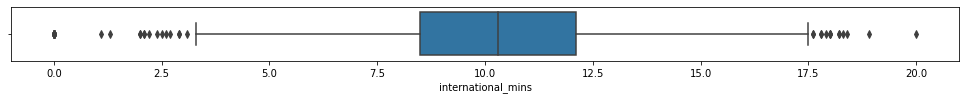

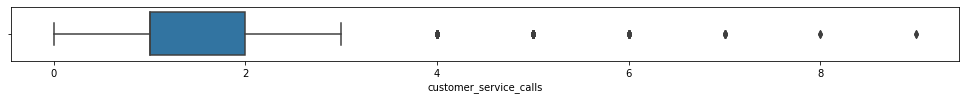

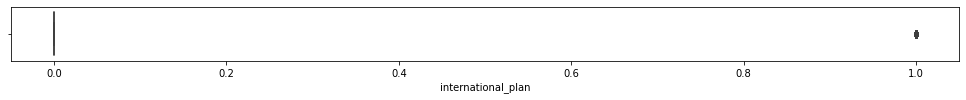

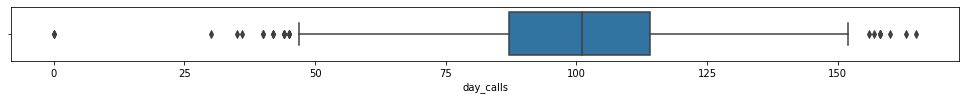

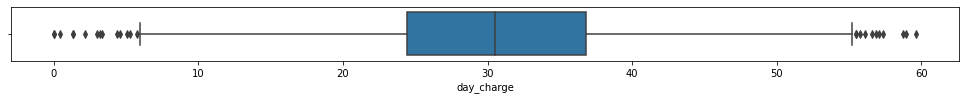

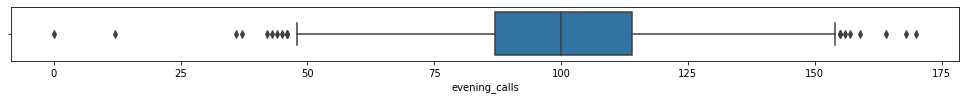

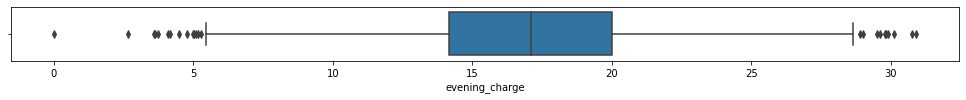

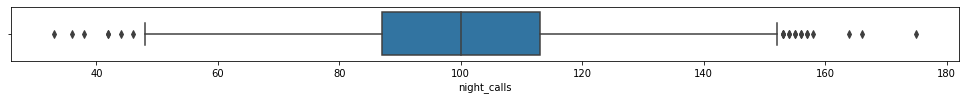

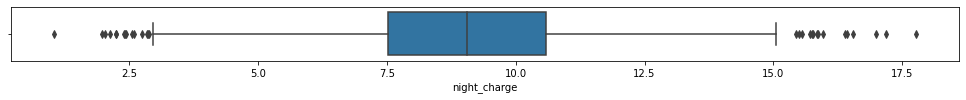

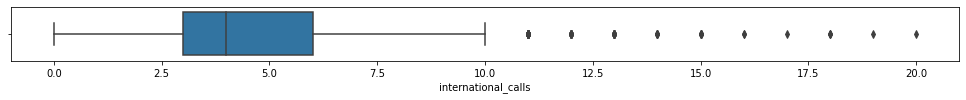

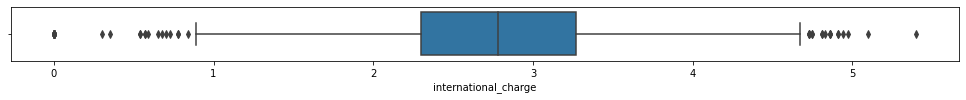

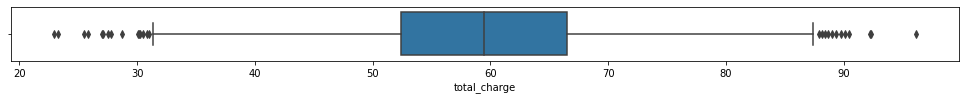

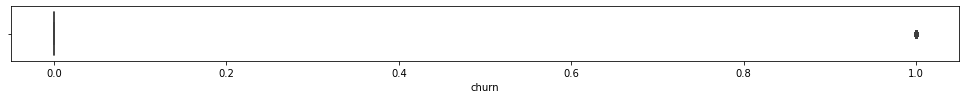

In [8]:

#printing boxplot for each numerical column present in the dataset
dg=df.select_dtypes(exclude=['object','bool'])
for column in dg :
     plt.figure(figsize=(17,1))
     sns.boxplot(data=dg, x=column)
plt.show()

**ObservATIONS**


1.   aFTER ANALYSING ALL THE ABOVE BOX PLOTS WE CAN SAY THAT THE GIVEN DATASET CONTAINS LOT OF NOISY DATA POINTS OT OUTLIERS 
2.   THE INDEPENDENT COLUMN "VOICE_MAIL_MESSEGES" HAVE ONLY ONE OUTLIER.
3.aS THE GIVEN DATA CONTAINS OUTLIERS NEED TO PERFORM ISOLATION FOREST IN ORDER TO REMOVE THE OUTLIERS.

hANDLING OUTLIERS BY USING ISOLATION FOREST


In [9]:
from pandas.core.common import random_state
from sklearn.ensemble import IsolationForest
df1 = df.copy()
clf = IsolationForest(random_state=10, contamination = 0.1)
clf.fit(df1)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=10)

In [10]:
outliere_predict = clf.predict(df1)
print (outliere_predict)

[ 1  1  1 ...  1 -1  1]


In [11]:
df["score"]=clf.decision_function(df1)
df["Anomaly"] = clf.predict(df1.iloc[:,0:19])
df1.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [12]:
outliers = df[df["Anomaly"]==-1]
outliers

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,score,Anomaly
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.062227,-1
9,141,1,37,258.6,222.0,326.4,11.2,0,1,84,...,111,18.87,97,14.69,5,3.02,80.54,0,-0.012455,-1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,97,27.01,128,7.23,9,1.46,92.29,1,-0.084793,-1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,121,14.44,64,9.43,6,1.54,36.02,1,-0.056372,-1
32,172,0,0,212.0,31.2,293.3,12.6,3,0,121,...,115,2.65,78,13.20,10,3.40,55.29,0,-0.036858,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,...,90,11.48,49,8.31,3,2.94,56.65,1,-0.019772,-1
3291,119,1,22,172.1,223.6,150.0,13.9,1,1,119,...,133,19.01,94,6.75,20,3.75,58.77,1,-0.042045,-1
3320,122,0,0,140.0,196.4,120.1,9.7,4,1,101,...,77,16.69,133,5.40,4,2.62,48.51,1,-0.013431,-1
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,...,122,22.57,72,8.12,2,3.11,88.39,1,-0.020728,-1


In [13]:
df1 = df.drop(df.index[df['Anomaly'] == -1]).reset_index()
df1 = df1.drop(columns=["index"])
df2 = df1.iloc[:,0:19]
df2

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
4,118,0,0,223.4,220.6,203.9,6.3,0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,79,0,0,134.7,189.7,221.4,11.8,2,0,98,22.90,68,16.12,128,9.96,5,3.19,52.17,0
2995,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
2996,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
2997,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0


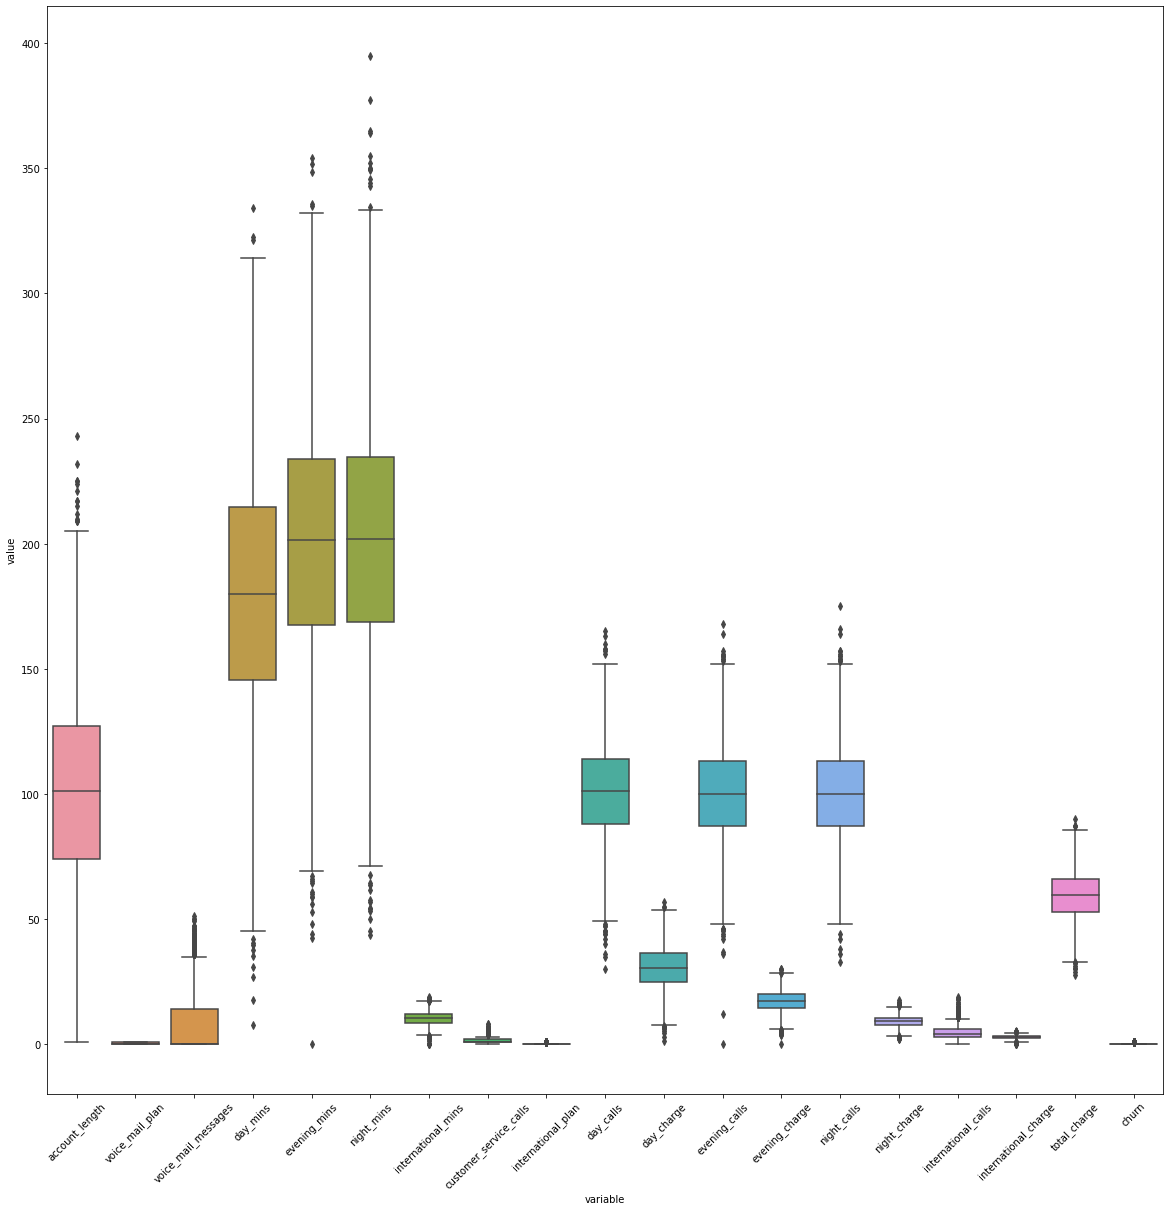

In [14]:
df2_melt = pd.melt(df2)

plt.figure(figsize=(20,20))
sns.boxplot(x="variable",y="value",data=df2_melt)
plt.xticks(rotation=45);

Observations:
after performing isolation forest we removed 334 rows from the original data which was containing the noise data points.


Detecting Multicollinearity


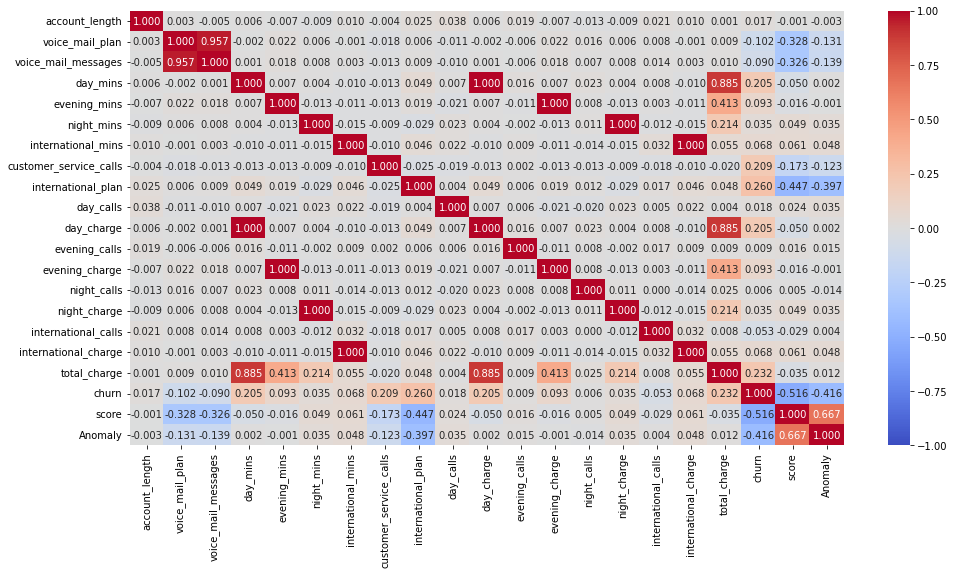

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap (df.corr(),annot=True, fmt='.3f',vmin=-1,vmax=1,center=0,cmap='coolwarm');

Obesrvations:
1. There are very strong correlation bw "voice_mail_plan and "voice_mail_massage" with calue 0.96.
2.there exist ver srtong positive linear correlation bw "day_mins" and"day_change"  with value 1.00
3.there exist ver srtong positive linear correlation bw "evening_mins" and"evening_change"  with value 1.00
4.there exist ver srtong positive linear correlation bw "night_mins" and"night_change"  with value 1.00
5.there exist ver srtong positive linear correlation bw "international_mins" and"international_change"  with value 1.00
6.there exist a strong positve correlation bw "day_mins" and "total_change" with value 0.87
7.there exist a strong positve correlation bw "day_change" and "total_change" with value 0.87
8. the correlation value for rest of the features is very less (almost 0)
9. 